## import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
 !pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 20.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=a915105b1d52491f0b8b4085ecd677da424c016f540513ee8a155ba4b3263676
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [3]:
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## import pyspark libraries
## import sparksession

In [4]:
import findspark
findspark.init()

In [5]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import struct,collect_list, explode

## load dataset

In [6]:
spark = SparkSession.builder.appName('DimReseller').getOrCreate()

In [7]:
df= spark.read.csv('/content/DimReseller.csv',header =True,inferSchema=True )

In [8]:
# type of dataframe
type(df)

pyspark.sql.dataframe.DataFrame

In [9]:
# show data frame
# 20 columns
df.show(3)

+-----------+------------+--------------------+------------+--------------------+--------------------+---------------+--------------+----------+--------------+-------------+-----------+--------------------+------------+-----------+--------------------+--------------+----------------+-------------+----------+
|ResellerKey|GeographyKey|ResellerAlternateKey|       Phone|        BusinessType|        ResellerName|NumberEmployees|OrderFrequency|OrderMonth|FirstOrderYear|LastOrderYear|ProductLine|        AddressLine1|AddressLine2|AnnualSales|            BankName|MinPaymentType|MinPaymentAmount|AnnualRevenue|YearOpened|
+-----------+------------+--------------------+------------+--------------------+--------------------+---------------+--------------+----------+--------------+-------------+-----------+--------------------+------------+-----------+--------------------+--------------+----------------+-------------+----------+
|          1|         637|          AW00000001|245-555-0173|Value Adde

## check all variable's datatype
* 11 interger columns
* 9 strings columns

In [10]:
df.printSchema()

root
 |-- ResellerKey: integer (nullable = true)
 |-- GeographyKey: integer (nullable = true)
 |-- ResellerAlternateKey: string (nullable = true)
 |-- Phone: string (nullable = true)
 |-- BusinessType: string (nullable = true)
 |-- ResellerName: string (nullable = true)
 |-- NumberEmployees: integer (nullable = true)
 |-- OrderFrequency: string (nullable = true)
 |-- OrderMonth: integer (nullable = true)
 |-- FirstOrderYear: integer (nullable = true)
 |-- LastOrderYear: integer (nullable = true)
 |-- ProductLine: string (nullable = true)
 |-- AddressLine1: string (nullable = true)
 |-- AddressLine2: string (nullable = true)
 |-- AnnualSales: integer (nullable = true)
 |-- BankName: string (nullable = true)
 |-- MinPaymentType: integer (nullable = true)
 |-- MinPaymentAmount: integer (nullable = true)
 |-- AnnualRevenue: integer (nullable = true)
 |-- YearOpened: integer (nullable = true)



In [11]:
# total count of data points in a column
df.count()

701

In [ ]:
len(df.columns)

20

## Quick Descriptive Data Analysis 
* mean and standard deviation of integer variables
* min and max values of non numeric variables
* Addressline2, MinPaymentAmount have a lot of missing data points
* OrderMonth, FirstOrderYear,	LastOrderYear have missing values too
and may be deleted if they dont have importance for my analysis. 

In [13]:
pd.set_option("display.max_columns", None) #display max length
df.describe().toPandas()

,summary,ResellerKey,GeographyKey,ResellerAlternateKey,Phone,BusinessType,ResellerName,NumberEmployees,OrderFrequency,OrderMonth,FirstOrderYear,LastOrderYear,ProductLine,AddressLine1,AddressLine2,AnnualSales,BankName,MinPaymentType,MinPaymentAmount,AnnualRevenue,YearOpened
0,count,701,701,701,701,701,701,701,701,635,635,635,701,701,33,701,701,569,191,701,701
1,mean,351.0,338.9657631954351,None,None,None,None,40.509272467902996,None,5.371653543307087,2006.0267716535434,2007.6220472440946,None,None,None,1584736.0912981455,None,2.0052724077328645,597.9057591623036,158473.60912981455,1990.2881597717546
2,stddev,202.50555547934974,197.28824155214662,None,None,None,None,29.465795902778975,None,1.6123976326685718,0.8259827163903997,0.6870723087026287,None,None,None,980951.9255563442,None,0.8168388298206808,190.27905136328096,98095.1925556345,9.131405127838882
3,min,1,1,AW00000001,1 (11) 500 555-0110,Specialty Bike Shop,A Bicycle Association,2,A,1,2005,2005,Mountain,#500-75 O'Connor Street,114 Albert Road,300000,Guardian Bank,1,200,30000,1974
4,max,701,655,AW00000701,996-555-0196,Warehouse,eCommerce Bikes,100,S,12,2008,2008,Touring,Wymbush,Verkaufsabteilung,3000000,United Security,3,1000,300000,2005


In [14]:
# check for the unique values and their counts in the variable 'BankName'
table1 = df.groupby('BankName').count()
table1.show()

+--------------------+-----+
|            BankName|count|
+--------------------+-----+
|     United Security|  100|
|International Sec...|  100|
|    Reserve Security|  100|
|Primary Bank & Re...|  100|
|       Guardian Bank|  101|
|Primary Internati...|  100|
|  International Bank|  100|
+--------------------+-----+



In [15]:
type(table1)

pyspark.sql.dataframe.DataFrame

In [16]:
df.groupby('OrderFrequency').count().show()

+--------------+-----+
|OrderFrequency|count|
+--------------+-----+
|             Q|  232|
|             A|  231|
|             S|  238|
+--------------+-----+



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark.pandas as ps

In [ ]:
# df.show(200)

# **FEATURE ENGINEERING**
**checking for normally distributed data set**

In [ ]:
df.show(1)

+-----------+------------+--------------------+------------+--------------------+------------+---------------+--------------+----------+--------------+-------------+-----------+------------------+------------+-----------+------------------+--------------+----------------+-------------+----------+
|ResellerKey|GeographyKey|ResellerAlternateKey|       Phone|        BusinessType|ResellerName|NumberEmployees|OrderFrequency|OrderMonth|FirstOrderYear|LastOrderYear|ProductLine|      AddressLine1|AddressLine2|AnnualSales|          BankName|MinPaymentType|MinPaymentAmount|AnnualRevenue|YearOpened|
+-----------+------------+--------------------+------------+--------------------+------------+---------------+--------------+----------+--------------+-------------+-----------+------------------+------------+-----------+------------------+--------------+----------------+-------------+----------+
|          1|         637|          AW00000001|245-555-0173|Value Added Reseller|A Bike Store|            

In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

In [20]:
# Convert pyspark.sql.dataframe.DataFrame to pyspark.pandas.frame.DataFrame
df_new = ps.DataFrame(df).set_index('ResellerKey')

In [ ]:
df_new.head(4)

,GeographyKey,ResellerAlternateKey,Phone,BusinessType,ResellerName,NumberEmployees,OrderFrequency,OrderMonth,FirstOrderYear,LastOrderYear,ProductLine,AddressLine1,AddressLine2,AnnualSales,BankName,MinPaymentType,MinPaymentAmount,AnnualRevenue,YearOpened
ResellerKey,,,,,,,,,,,,,,,,,,,
1,637,AW00000001,245-555-0173,Value Added Reseller,A Bike Store,2,S,5,2005,2006,Road,2251 Elliot Avenue,None,300000,International Bank,NaN,NaN,30000,1974
2,635,AW00000002,170-555-0127,Specialty Bike Shop,Progressive Sports,10,A,5,2006,2008,Mountain,3207 S Grady Way,None,800000,International Security,1.0,NaN,80000,1976
3,584,AW00000003,279-555-0130,Warehouse,Advanced Bike Components,40,Q,6,2005,2008,Road,12345 Sterling Avenue,None,1500000,Primary International,2.0,NaN,150000,1978
4,572,AW00000004,710-555-0173,Value Added Reseller,Modular Cycle Systems,5,S,4,2006,2008,Road,800 Interchange Blvd.,Suite 2501,300000,United Security,3.0,600.0,30000,1980


## collecting only numeric columns into a new dataframe

In [62]:
df_num=df_new[['NumberEmployees','OrderMonth','FirstOrderYear','LastOrderYear','AnnualSales','YearOpened','MinPaymentType','MinPaymentAmount','AnnualRevenue']]
#df_num

In [68]:
# Plot spark dataframe
#df_num.NumberEmployees.plot.pie()

 ## Checking for normally distributed data
 * collecting numeric columns
 * histogram distribution of all the numeric columns

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

`to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

`to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.



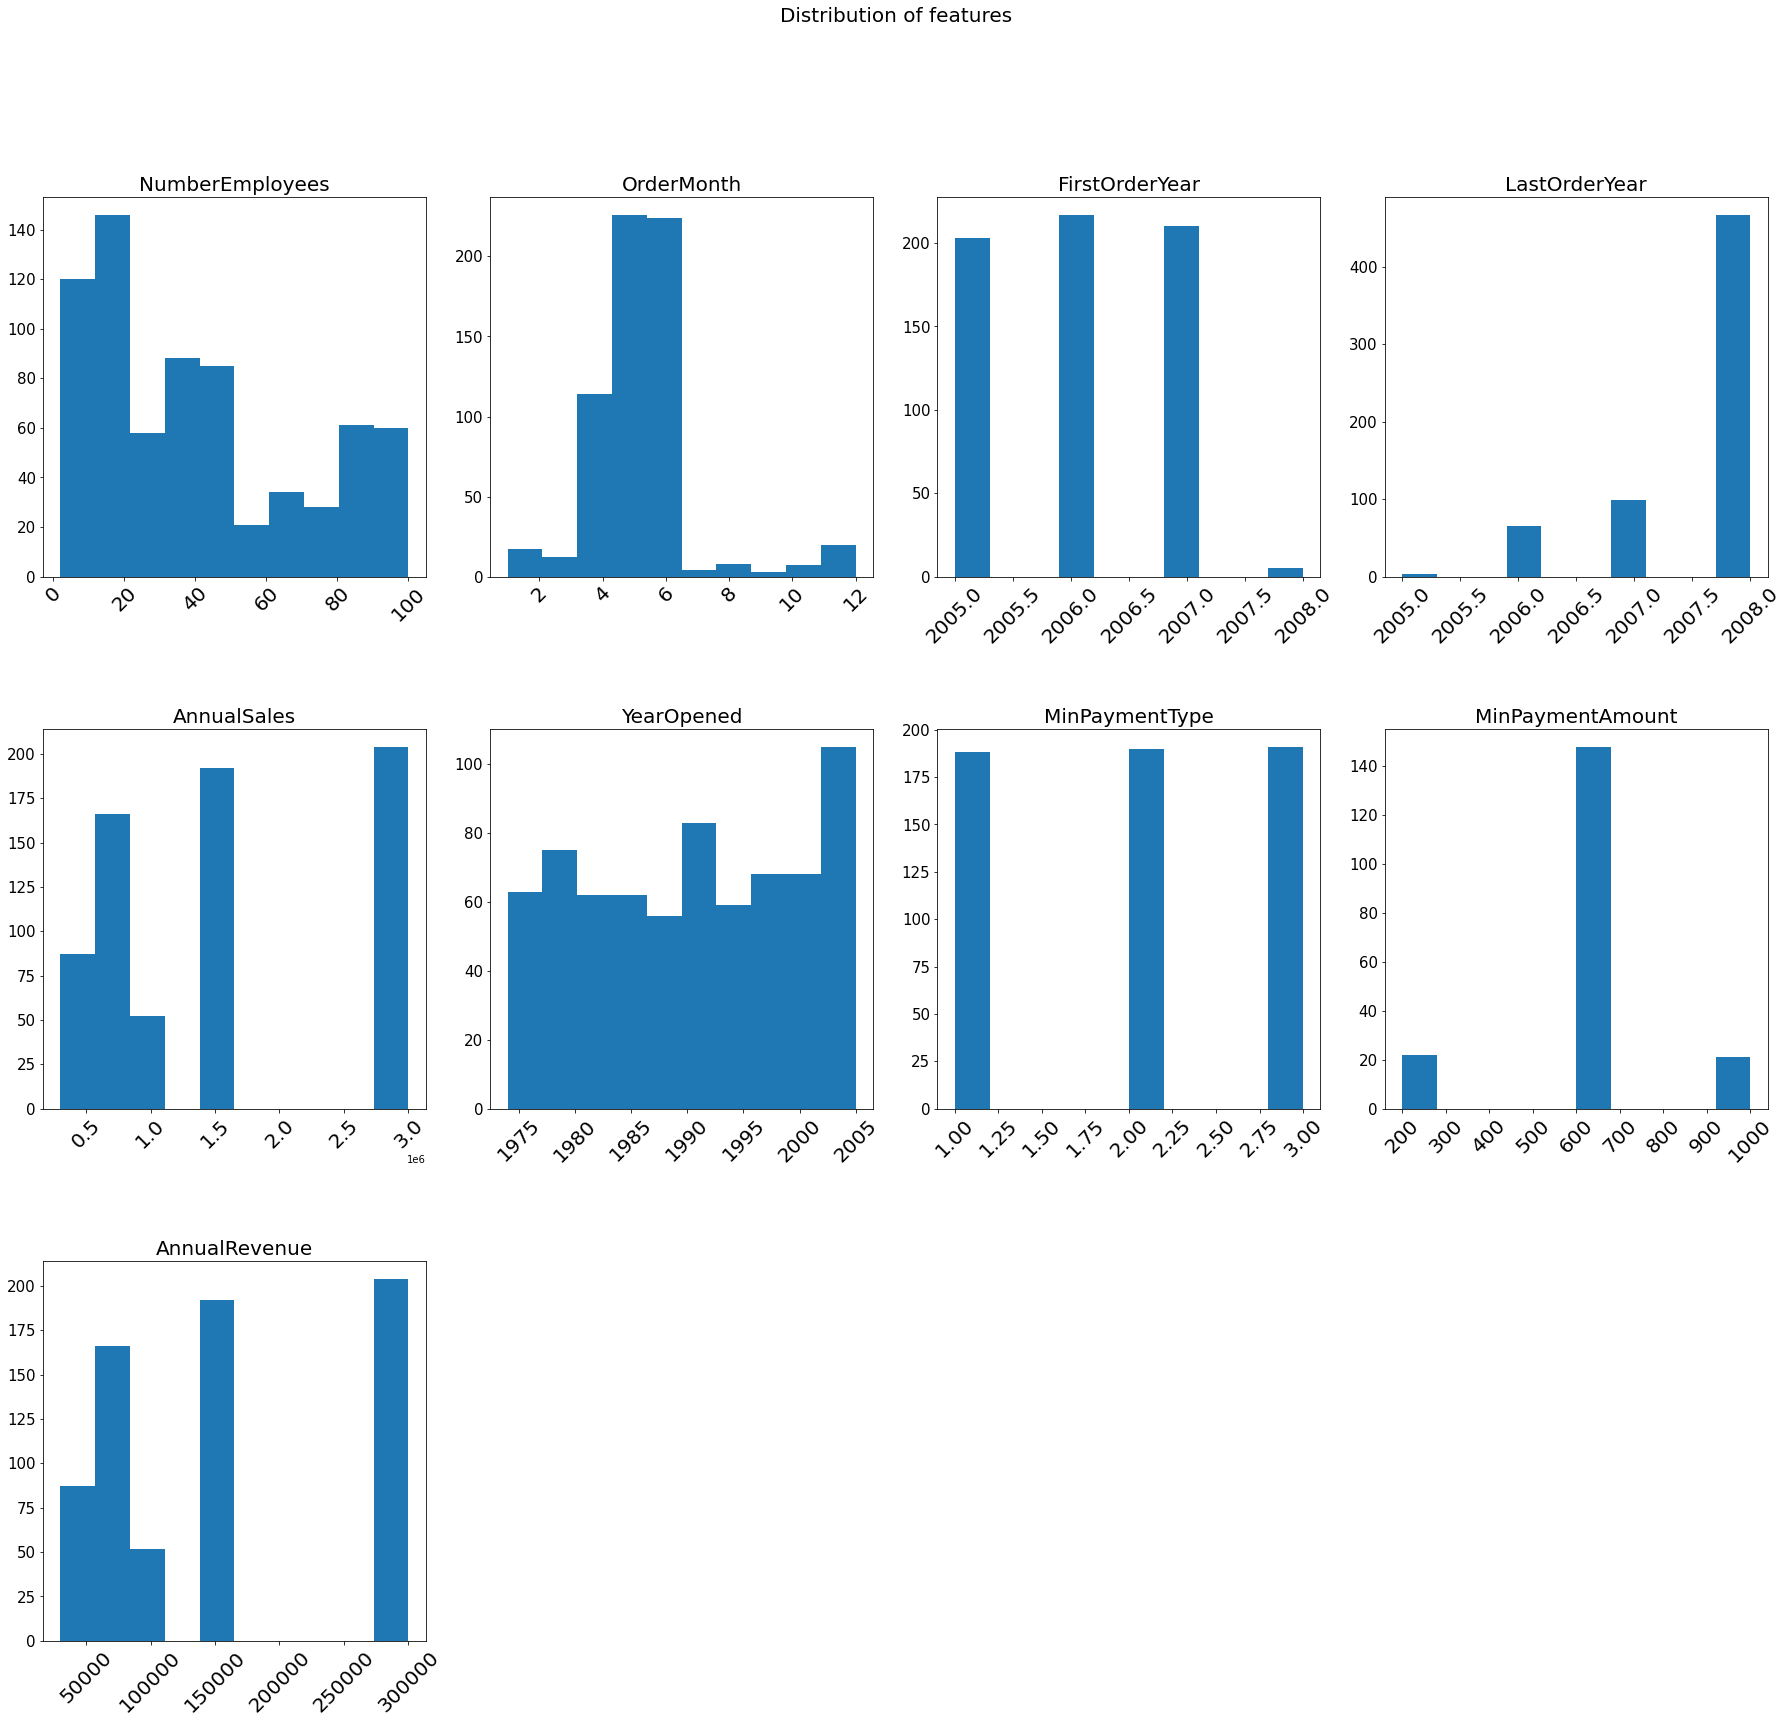

In [69]:
fig = plt.figure(figsize =(25,25))
title =fig.suptitle('Distribution of features',fontsize=20,verticalalignment='center')
for col, num in zip(df_num.columns,range(1,10)):
  ax = fig.add_subplot(3,4,num)
  ax.hist(df_num.to_pandas()[col])
  plt.grid(False)
  plt.xticks(rotation=45, fontsize=20)
  plt.yticks(fontsize=15)
  plt.title(col,fontsize=20)

plt.tight_layout()
title.set_y(0.95)
fig.subplots_adjust(top =0.85, hspace=0.4)


from the histrogram plots above, it shows that some variables are heavily skewed. 
for the AnnualRevenue variable appears to be a bit normally distributed though there are outliers ans the ordermonth.

# description analysis and comparison of null values in the dataset

In [71]:
#!pip install missingno

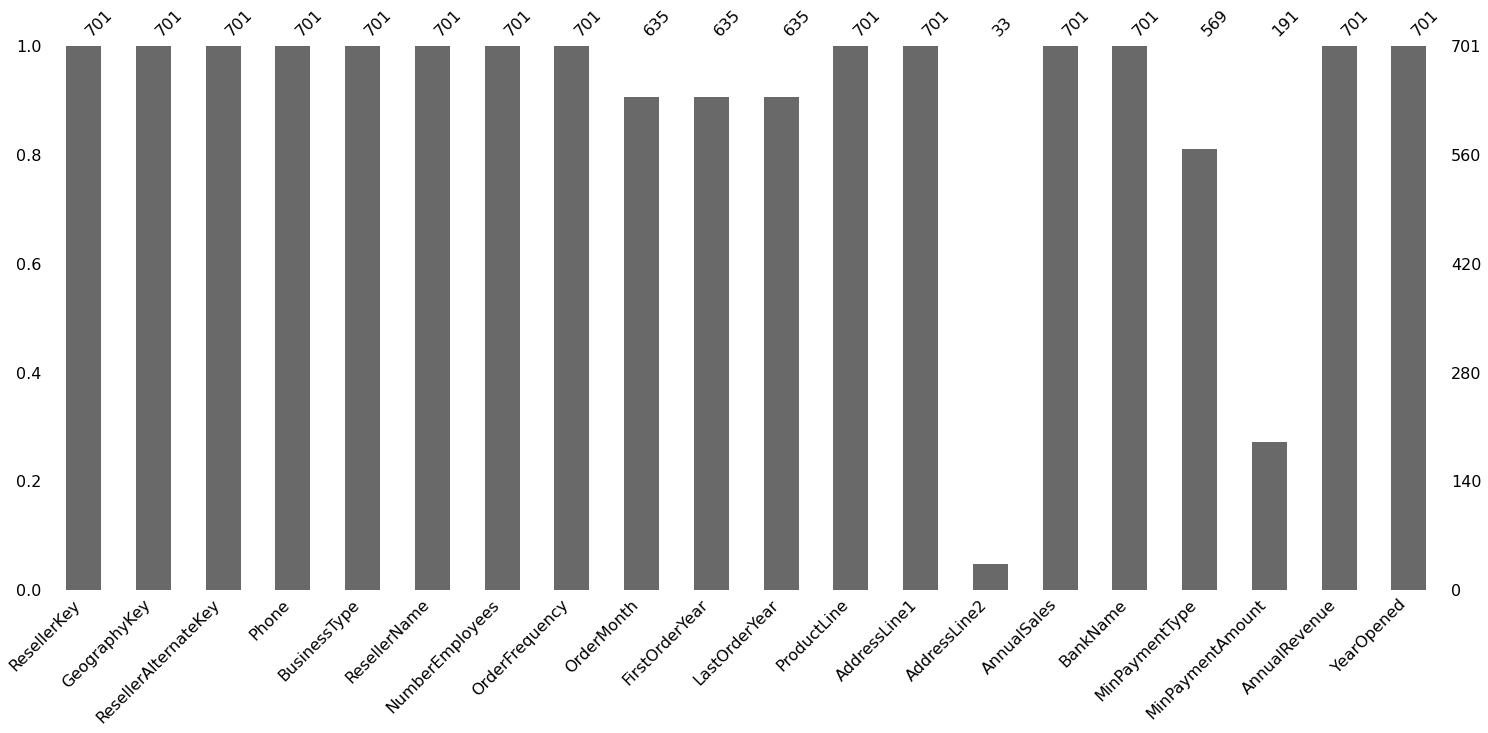

In [73]:
# bar plot of all the variables
# Addressine2 has the lowest bar plot about 33count fllowed by minPaymentAmount
# Most variables have complete bar including annual revenue.
import missingno as msno
msno.bar(df.toPandas())

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/generic.py:647: UserWarning: We recommend using `DataFrame.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))
/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/usr/local/lib/python3.8/dist-packages/pyspark/pandas/generic.py:647: UserWarning: We recommend using `Series.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))
/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnS

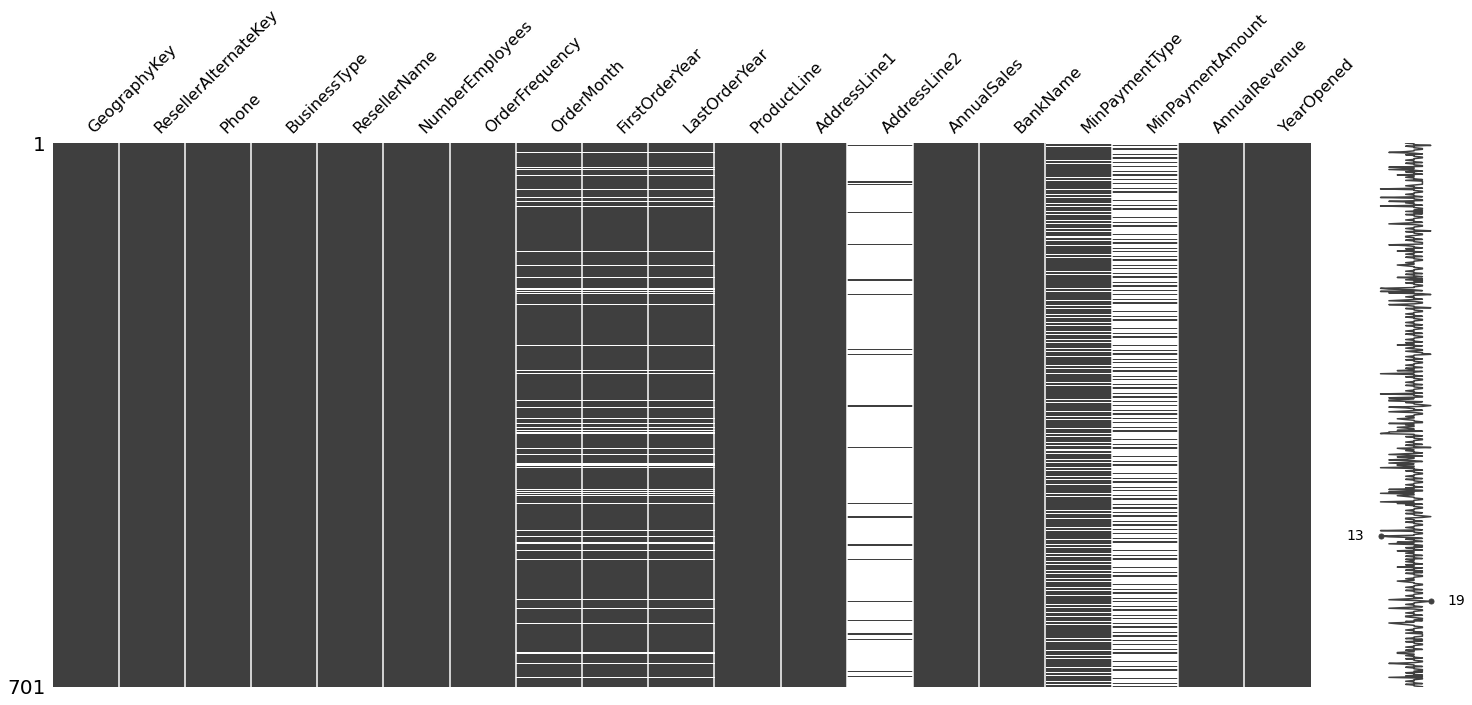

In [ ]:
# again the metrics confirms more missing values in AddressLine2 with white patches.
# Bars with uniformly complete black/grey means no missing data
msno.matrix(df_new)

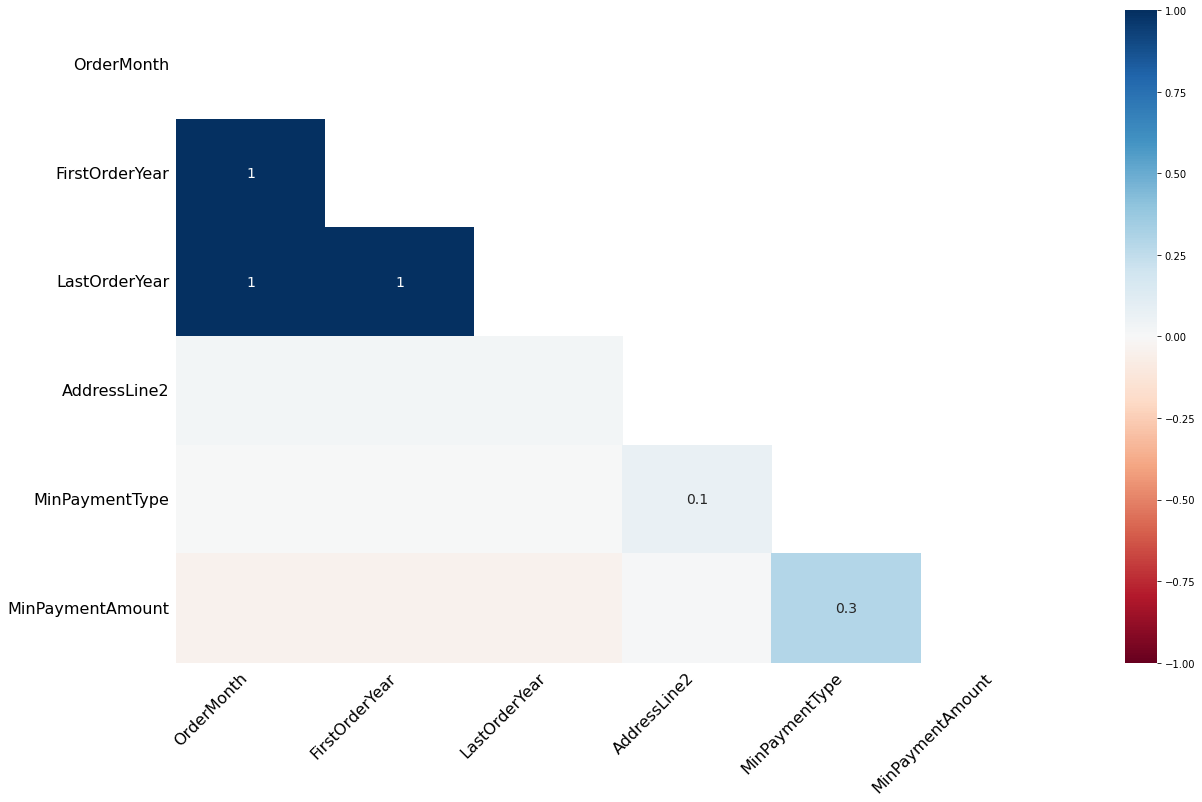

In [75]:
msno.heatmap(df.toPandas())

* the heat map shows thats OrderMonth, FirstOrderYear and LastOrderYear correlates with each in term of null values. since they all have correlation of 1.
while Minpyamenttype and AddressLine2 has no correlation of 0.1. it is close to 0.

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/generic.py:647: UserWarning: We recommend using `DataFrame.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))
/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


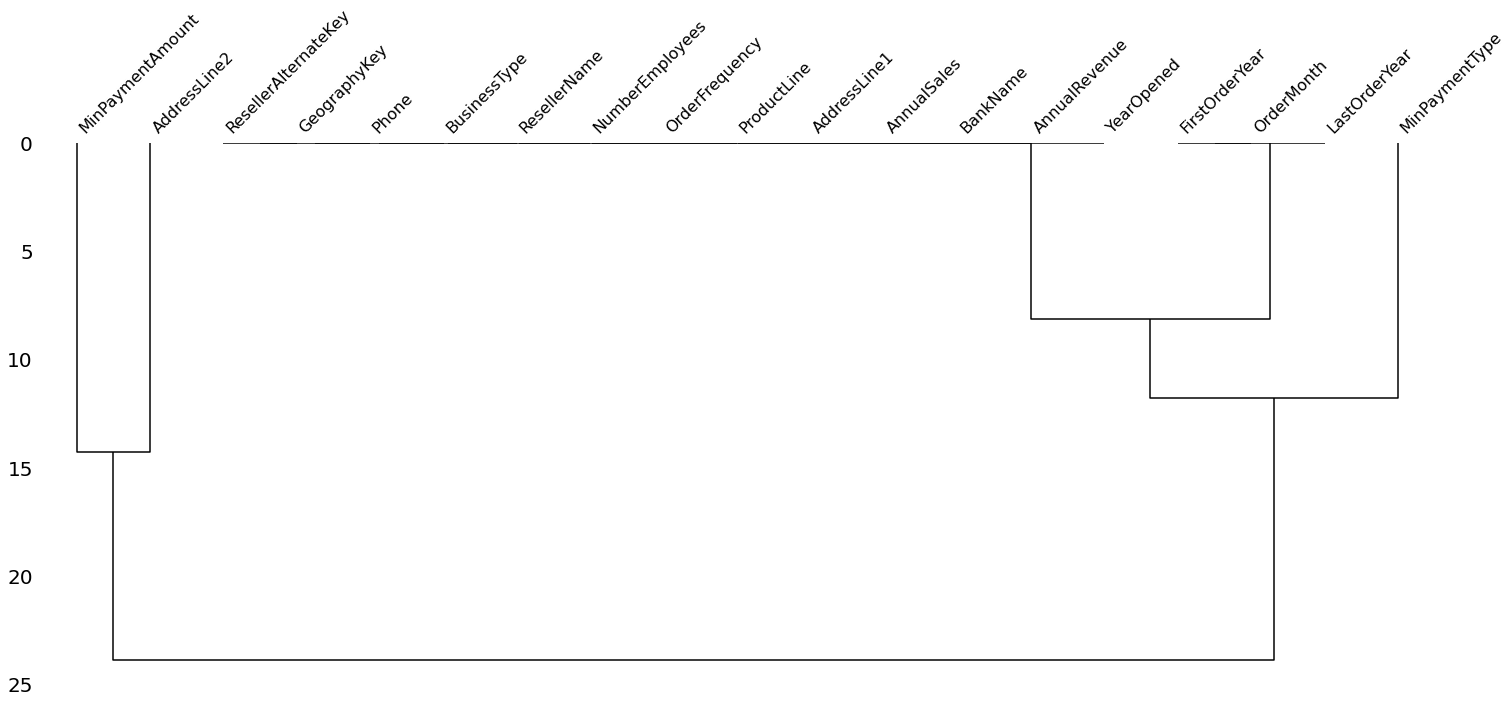

In [ ]:
msno.dendrogram(df_new)

* dendrogram plot also show that the variables with the close amount of missing values are plotted together.

dropping the 2 column because they have a more than 70 percent of data values in the column
Dropping MinPaymentAmount
* besides from the dendrogram it has no correlation with any other variable
Dropping AddressLine2 - about 90% missing data points.

In [ ]:
df_dropped = df_new.drop(['AddressLine2','MinPaymentAmount'], axis = 1)
df_dropped.head(1)

,GeographyKey,ResellerAlternateKey,Phone,BusinessType,ResellerName,NumberEmployees,OrderFrequency,OrderMonth,FirstOrderYear,LastOrderYear,ProductLine,AddressLine1,AnnualSales,BankName,MinPaymentType,AnnualRevenue,YearOpened
ResellerKey,,,,,,,,,,,,,,,,,
1,637,AW00000001,245-555-0173,Value Added Reseller,A Bike Store,2,S,5,2005,2006,Road,2251 Elliot Avenue,300000,International Bank,NaN,30000,1974


* new dataframe

In [ ]:
#type of dataframe
type(df_dropped)

pyspark.pandas.frame.DataFrame

In [ ]:
df_num=df_dropped[['NumberEmployees','OrderMonth','FirstOrderYear','LastOrderYear','AnnualSales','YearOpened','MinPaymentType','AnnualRevenue']]
df_num.head(1)

,NumberEmployees,OrderMonth,FirstOrderYear,LastOrderYear,AnnualSales,YearOpened,MinPaymentType,AnnualRevenue
ResellerKey,,,,,,,,
1,2,5,2005,2006,300000,1974,NaN,30000


In [18]:
df_num.info()

NameError: ignored

In [ ]:
type(df_num)

pyspark.pandas.frame.DataFrame

In [ ]:
# from sklearn.impute import SimpleImputer

In [ ]:
# mean_imputer = SimpleImputer(strategy='mean')

In [ ]:
# df_num.iloc[:, :] = mean_imputer.fit_transform(df_num)

In [ ]:
df_num.head(1)

,NumberEmployees,OrderMonth,FirstOrderYear,LastOrderYear,AnnualSales,YearOpened,MinPaymentType,AnnualRevenue
ResellerKey,,,,,,,,
1,2.0,5.0,2005.0,2006.0,300000.0,1974.0,NaN,30000.0


## mean and median imputation for some missing values

In [ ]:
df_num['OrderMonth'].fillna(int(df_num['OrderMonth'].mean()), inplace=True)

In [ ]:
df_num['FirstOrderYear'].fillna(int(df_num['FirstOrderYear'].mean()), inplace=True)

In [ ]:
df_num['LastOrderYear'].fillna(int(df_num['LastOrderYear'].median()), inplace=True)

In [ ]:
df_num['MinPaymentType'].fillna(int(df_num['MinPaymentType'].mean()), inplace=True)

In [ ]:
df_num.head(1)

,NumberEmployees,OrderMonth,FirstOrderYear,LastOrderYear,AnnualSales,YearOpened,MinPaymentType,AnnualRevenue
ResellerKey,,,,,,,,
1,2.0,5.0,2005.0,2006.0,300000.0,1974.0,2.0,30000.0


## Regression analysis

In [19]:

# import machine learning tools

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

## select a new table for machine learning analysis

In [20]:
# combine variables for better output. this is better than using a single variable
ml_data = df.select(df.NumberEmployees,df.YearOpened,df.AnnualRevenue)
ml_data.show(3)

+---------------+----------+-------------+
|NumberEmployees|YearOpened|AnnualRevenue|
+---------------+----------+-------------+
|              2|      1974|        30000|
|             10|      1976|        80000|
|             40|      1978|       150000|
+---------------+----------+-------------+
only showing top 3 rows



In [21]:
type(ml_data)

pyspark.sql.dataframe.DataFrame

In [22]:
# for index when bringing out coefficient
coeff_variables = ('NumberEmployees','YearOpened') 

In [23]:
# use feature transformer that merges multiple columns into vector

assembler= VectorAssembler(inputCols=['NumberEmployees','YearOpened'],
                           outputCol='features')

In [24]:
assembler

VectorAssembler_68f19e7e867f

In [25]:
# fit transform
output =assembler.transform(ml_data)

In [26]:
df_ml = output.select('features','AnnualRevenue')

In [27]:
type(df_ml)

pyspark.sql.dataframe.DataFrame

## traning the data
## split them in to
* train data 80%
* test data 20%

In [28]:
# divide the data using code.
train_data, test_data = df_ml.randomSplit([0.8,0.2])

## compare the statistics of the train and test data

In [29]:
# summary of train data
train_data.describe().show()

+-------+------------------+
|summary|     AnnualRevenue|
+-------+------------------+
|  count|               565|
|   mean|158053.09734513273|
| stddev| 99206.59015550865|
|    min|             30000|
|    max|            300000|
+-------+------------------+



In [30]:
# summary of test data both having the min and max but different count.
test_data.describe().show()

+-------+------------------+
|summary|     AnnualRevenue|
+-------+------------------+
|  count|               136|
|   mean|160220.58823529413|
| stddev| 93669.76595714453|
|    min|             30000|
|    max|            300000|
+-------+------------------+



## import Linearregression from pyspark

In [31]:
from pyspark.ml.regression import LinearRegression

In [32]:
lm =LinearRegression(labelCol='AnnualRevenue')

In [33]:
# fit the model
model =lm.fit(train_data)

## Bring out the coeficients of the variables

In [34]:
pd.DataFrame({'coeficients': model.coefficients}, index = coeff_variables)

,coeficients
NumberEmployees,3164.221846
YearOpened,551.917481


In [35]:
intercept = print("Intercept: " + str(model.intercept))

Intercept: -1069155.1536565043


* It shows that for every 1 employee added to the company will increase the Annual Revenue by 3164.2(in dollars or pounds)
* for every additional year opened the Annual revenue increased by 551.92

In [36]:
# evaluate the model
model_eval = model.evaluate(test_data)

In [37]:
# to see the residuals
model_eval.residuals.show()

+-------------------+
|          residuals|
+-------------------+
| 3341.6021801240277|
| 3341.6021801240277|
| 3341.6021801240277|
| 1685.8497366835363|
| -6298.346399198519|
| -7402.181361492258|
| -9462.568245419068|
| -9462.568245419068|
|-13877.908094594022|
|-13877.908094594022|
| -9315.285204758402|
| -9315.285204758402|
|-14282.542535080342|
|-22266.738670962164|
| 28027.827410358936|
| 28027.827410358936|
| 28027.827410358936|
| 26923.992448065197|
| 26923.992448065197|
|  19749.06519315578|
+-------------------+
only showing top 20 rows



In [56]:
unlabeled_data =test_data.select('features','AnnualRevenue')

In [57]:
# predictions
predictions = model.transform(unlabeled_data)

In [58]:
predictions.show()

+-------------+-------------+------------------+
|     features|AnnualRevenue|        prediction|
+-------------+-------------+------------------+
| [2.0,1974.0]|        30000|26658.397819875972|
| [2.0,1974.0]|        30000|26658.397819875972|
| [2.0,1974.0]|        30000|26658.397819875972|
| [2.0,1977.0]|        30000|28314.150263316464|
| [4.0,1980.0]|        30000| 36298.34639919852|
| [4.0,1982.0]|        30000| 37402.18136149226|
| [5.0,1980.0]|        30000| 39462.56824541907|
| [5.0,1980.0]|        30000| 39462.56824541907|
| [5.0,1988.0]|        30000| 43877.90809459402|
| [5.0,1988.0]|        30000| 43877.90809459402|
| [6.0,1974.0]|        30000|  39315.2852047584|
| [6.0,1974.0]|        30000|  39315.2852047584|
| [6.0,1983.0]|        30000| 44282.54253508034|
| [8.0,1986.0]|        30000|52266.738670962164|
|[10.0,1974.0]|        80000|51972.172589641064|
|[10.0,1974.0]|        80000|51972.172589641064|
|[10.0,1974.0]|        80000|51972.172589641064|
|[10.0,1976.0]|     

# showing the error values

In [59]:
print('MAE:', model_eval.meanAbsoluteError)
print('MSE:', model_eval.meanSquaredError)
print('RMSE:', model_eval.rootMeanSquaredError)
print('R2:', model_eval.r2)
print('Ad:', model_eval.r2adj)

MAE: 19911.069310513565
MSE: 798001414.1421427
RMSE: 28248.91881368458
R2: 0.9083758559226855
Ad: 0.9069980492448312


In [60]:
from pyspark.ml.stat import Correlation

In [61]:
matrix_num = Correlation.corr(unlabeled_data, 'features')
matrix_num.collect()[0]["pearson({})".format('features')].toArray()

array([[1.        , 0.16105019],
       [0.16105019, 1.        ]])

# EDA 

In [201]:
spark = SparkSession.builder.appName('DimCurrency').getOrCreate()
dimCurrency = spark.read.csv('/content/DimCurrency.csv',header =True,inferSchema=True)

In [202]:
type(dimCurrency)

pyspark.sql.dataframe.DataFrame

In [203]:
spark = SparkSession.builder.appName('factCurrencyRate').getOrCreate()
factCurrency = spark.read.csv('FactCurrencyRate.csv',header =True,inferSchema=True)


In [204]:
spark = SparkSession.builder.appName('dimdate').getOrCreate()
dimdate = spark.read.csv('DimDate.csv',header =True,inferSchema=True)

In [205]:
type(factCurrency)

pyspark.sql.dataframe.DataFrame

In [206]:
#dimCurrency.createOrReplaceTempView("call")
#factCurrency.createOrReplaceTempView("currency")


In [207]:
data1 = factCurrency.join(dimCurrency, 
               factCurrency.CurrencyKey == dimCurrency.CurrencyKey, 
               "rightouter")
data1.show(4)

+-----------+--------+-----------------+-----------------+-------------------+-----------+--------------------+--------------+
|CurrencyKey| DateKey|      AverageRate|     EndOfDayRate|               Date|CurrencyKey|CurrencyAlternateKey|  CurrencyName|
+-----------+--------+-----------------+-----------------+-------------------+-----------+--------------------+--------------+
|       null|    null|             null|             null|               null|          1|                 AFA|       Afghani|
|       null|    null|             null|             null|               null|          2|                 DZD|Algerian Dinar|
|          3|20080831|0.274725274725275|0.274755467633806|2008-08-31 00:00:00|          3|                 ARS|Argentine Peso|
|          3|20080830|0.274725274725275| 0.27467999780256|2008-08-30 00:00:00|          3|                 ARS|Argentine Peso|
+-----------+--------+-----------------+-----------------+-------------------+-----------+--------------------+

In [208]:
data = data1.join(dimdate,
                  data1.DateKey == dimdate.DateKey,
                  "inner")

data.show(5)


+-----------+--------+-----------+-----------------+-------------------+-----------+--------------------+--------------+--------+--------------------+---------------+--------------------+--------------------+-------------------+----------------+---------------+----------------+----------------+----------------+---------------+-----------------+---------------+------------+----------------+-------------+----------+--------------+----------+
|CurrencyKey| DateKey|AverageRate|     EndOfDayRate|               Date|CurrencyKey|CurrencyAlternateKey|  CurrencyName| DateKey|FullDateAlternateKey|DayNumberOfWeek|EnglishDayNameOfWeek|SpanishDayNameOfWeek|FrenchDayNameOfWeek|DayNumberOfMonth|DayNumberOfYear|WeekNumberOfYear|EnglishMonthName|SpanishMonthName|FrenchMonthName|MonthNumberOfYear|CalendarQuarter|CalendarYear|CalendarSemester|FiscalQuarter|FiscalYear|FiscalSemester|  Max Year|
+-----------+--------+-----------+-----------------+-------------------+-----------+--------------------+-------

# EXPLORING THE DATASET

In [209]:
# check all the columns to see the variable, datatype and nullable
data.printSchema()

root
 |-- CurrencyKey: integer (nullable = true)
 |-- DateKey: integer (nullable = true)
 |-- AverageRate: double (nullable = true)
 |-- EndOfDayRate: double (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- CurrencyKey: integer (nullable = true)
 |-- CurrencyAlternateKey: string (nullable = true)
 |-- CurrencyName: string (nullable = true)
 |-- DateKey: integer (nullable = true)
 |-- FullDateAlternateKey: string (nullable = true)
 |-- DayNumberOfWeek: integer (nullable = true)
 |-- EnglishDayNameOfWeek: string (nullable = true)
 |-- SpanishDayNameOfWeek: string (nullable = true)
 |-- FrenchDayNameOfWeek: string (nullable = true)
 |-- DayNumberOfMonth: integer (nullable = true)
 |-- DayNumberOfYear: integer (nullable = true)
 |-- WeekNumberOfYear: integer (nullable = true)
 |-- EnglishMonthName: string (nullable = true)
 |-- SpanishMonthName: string (nullable = true)
 |-- FrenchMonthName: string (nullable = true)
 |-- MonthNumberOfYear: integer (nullable = true)
 |-- Calend

In [130]:
# number of coumns
len(data.columns)

28

# the data set has 28 columns
* 15 coumns are integer
* 2 columns are floating point numbers 
* 10 column is string
* 1 column is datetime

## Descriptive analytics of the dataset.

In [210]:
data.describe().toPandas()

,summary,CurrencyKey,DateKey,AverageRate,EndOfDayRate,CurrencyKey,CurrencyAlternateKey,CurrencyName,DateKey,FullDateAlternateKey,DayNumberOfWeek,EnglishDayNameOfWeek,SpanishDayNameOfWeek,FrenchDayNameOfWeek,DayNumberOfMonth,DayNumberOfYear,WeekNumberOfYear,EnglishMonthName,SpanishMonthName,FrenchMonthName,MonthNumberOfYear,CalendarQuarter,CalendarYear,CalendarSemester,FiscalQuarter,FiscalYear,FiscalSemester,Max Year
0,count,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264
1,mean,53.07809871003926,2.0066050872686483E7,0.5240943298300432,0.5240986173938906,53.07809871003926,None,None,2.0066050872686483E7,None,4.002383623107123,None,None,None,15.749298934380258,186.92484576556365,27.389091418956813,None,None,None,6.649607403252944,2.5594503645541224,2006.5370162647223,1.5423443634324172,2.390072910824453,2007.0793606281547,1.4576556365675828,None
2,stddev,39.67648302102155,9964.995141941907,0.45067743255642195,0.4506843184715815,39.67648302102155,None,None,9964.995141941907,None,2.0023459381170605,None,None,None,8.810768163441017,102.77069137787424,14.777080013072197,None,None,None,3.364412175145023,1.0921114554731304,1.01016551589515,0.49822119288702893,1.1365951089611517,0.9182440348161087,0.49822119288702893,None
3,min,3,20050701,6.66666666666667E-4,6.66688889629654E-4,3,ARS,Argentine Peso,20050701,01/01/2006,1,Friday,Domingo,Dimanche,1,1,1,April,Abril,Ao�t,1,1,2005,1,1,2006,1,01/01/2008
4,max,103,20080831,1.65398610651671,1.6553550736633,103,VEB,Yuan Renminbi,20080831,31/12/2007,7,Wednesday,Viernes,Vendredi,31,365,53,September,Septiembre,Septembre,12,4,2008,2,4,2009,2,01/01/2008


* This shows the mean and the standard deviation of the numeric columns and the mode of the non-numeric columns.


# Checking the unique values of the columns of interest.

In [211]:
data.groupby('SpanishDayNameOfWeek').count().show()

+--------------------+-----+
|SpanishDayNameOfWeek|count|
+--------------------+-----+
|              S�bado| 2046|
|           Mi�rcoles| 2032|
|              Martes| 2032|
|              Jueves| 2032|
|               Lunes| 2032|
|             Domingo| 2044|
|             Viernes| 2046|
+--------------------+-----+



In [134]:
data.groupby('FrenchMonthName').count().show()

+---------------+-----+
|FrenchMonthName|count|
+---------------+-----+
|           Ao�t| 1550|
|          Avril| 1080|
|           Mars| 1116|
|        Juillet| 1550|
|      Septembre| 1140|
|        Octobre| 1178|
|        Janvier| 1116|
|            Mai| 1116|
|       Novembre| 1140|
|           Juin| 1080|
|       D�cembre| 1178|
|        F�vrier| 1020|
+---------------+-----+



In [163]:
data.groupby('CurrencyName').count().show()

+--------------------+-----+
|        CurrencyName|count|
+--------------------+-----+
|      Brazilian Real| 1158|
|                 Yen| 1158|
|   Australian Dollar| 1158|
|         Saudi Riyal| 1158|
|        French Franc|  184|
|                EURO| 1158|
|        Mexican Peso| 1158|
|     Canadian Dollar| 1158|
|United Kingdom Pound| 1158|
|       Deutsche Mark|  184|
|           US Dollar| 1158|
|             Bolivar| 1158|
|       Yuan Renminbi| 1158|
|      Argentine Peso| 1158|
+--------------------+-----+



In [181]:
# row 
data.count()

14264

In [182]:
data.show(1)

+-----------+--------+-----------+-----------------+-------------------+-----------+--------------------+--------------+--------+--------------------+---------------+--------------------+--------------------+-------------------+----------------+---------------+----------------+----------------+----------------+---------------+-----------------+---------------+------------+----------------+-------------+----------+--------------+----------+
|CurrencyKey| DateKey|AverageRate|     EndOfDayRate|               Date|CurrencyKey|CurrencyAlternateKey|  CurrencyName| DateKey|FullDateAlternateKey|DayNumberOfWeek|EnglishDayNameOfWeek|SpanishDayNameOfWeek|FrenchDayNameOfWeek|DayNumberOfMonth|DayNumberOfYear|WeekNumberOfYear|EnglishMonthName|SpanishMonthName|FrenchMonthName|MonthNumberOfYear|CalendarQuarter|CalendarYear|CalendarSemester|FiscalQuarter|FiscalYear|FiscalSemester|  Max Year|
+-----------+--------+-----------+-----------------+-------------------+-----------+--------------------+-------

## dropping the currencykey and datekey as they appear twice
## FullDateAlternateKey as I will be using the CurrencyAlternateKey as the primary for the new dataset.

In [192]:
data.drop('CurrencyKey','Datekey','FullDateAlternateKey').printSchema()

root
 |-- AverageRate: double (nullable = true)
 |-- EndOfDayRate: double (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- CurrencyAlternateKey: string (nullable = true)
 |-- CurrencyName: string (nullable = true)
 |-- DayNumberOfWeek: integer (nullable = true)
 |-- EnglishDayNameOfWeek: string (nullable = true)
 |-- SpanishDayNameOfWeek: string (nullable = true)
 |-- FrenchDayNameOfWeek: string (nullable = true)
 |-- DayNumberOfMonth: integer (nullable = true)
 |-- DayNumberOfYear: integer (nullable = true)
 |-- WeekNumberOfYear: integer (nullable = true)
 |-- EnglishMonthName: string (nullable = true)
 |-- SpanishMonthName: string (nullable = true)
 |-- FrenchMonthName: string (nullable = true)
 |-- MonthNumberOfYear: integer (nullable = true)
 |-- CalendarQuarter: integer (nullable = true)
 |-- CalendarYear: integer (nullable = true)
 |-- CalendarSemester: integer (nullable = true)
 |-- FiscalQuarter: integer (nullable = true)
 |-- FiscalYear: integer (nullable = true)


In [193]:
new_data.show(1)

+-----------+-----------------+-------------------+--------------------+--------------+---------------+--------------------+--------------------+-------------------+----------------+---------------+----------------+----------------+----------------+---------------+-----------------+---------------+------------+----------------+-------------+----------+--------------+----------+
|AverageRate|     EndOfDayRate|               Date|CurrencyAlternateKey|  CurrencyName|DayNumberOfWeek|EnglishDayNameOfWeek|SpanishDayNameOfWeek|FrenchDayNameOfWeek|DayNumberOfMonth|DayNumberOfYear|WeekNumberOfYear|EnglishMonthName|SpanishMonthName|FrenchMonthName|MonthNumberOfYear|CalendarQuarter|CalendarYear|CalendarSemester|FiscalQuarter|FiscalYear|FiscalSemester|  Max Year|
+-----------+-----------------+-------------------+--------------------+--------------+---------------+--------------------+--------------------+-------------------+----------------+---------------+----------------+----------------+------

In [194]:
type(new_data)

pyspark.sql.dataframe.DataFrame

#DATA PREPROCESSING


### CHECK FOR NUMBER OF NULL VALUES IN EACH COLUMN

In [195]:
from pyspark.sql.functions import col, isnan, when, count

In [197]:
#new_data.select([count(when(isnan(c)|col(c).isNull(),c)).alias(c) for c in new_data.columns]).show()

In [173]:
# date is showing datetime as datatype.
new_data.select('Date').show(10)

+-------------------+
|               Date|
+-------------------+
|2005-07-01 00:00:00|
|2005-07-02 00:00:00|
|2005-07-03 00:00:00|
|2005-07-04 00:00:00|
|2005-07-05 00:00:00|
|2005-07-06 00:00:00|
|2005-07-07 00:00:00|
|2005-07-08 00:00:00|
|2005-07-09 00:00:00|
|2005-07-10 00:00:00|
+-------------------+
only showing top 10 rows



# converting date from timestand and get some numeric columns from it.
* I will keep only year and month

In [198]:
from pyspark.sql import functions as func
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col

In [199]:
new_data = new_data\
.withColumn('Year', func.year('Date'))

new_data = new_data\
.withColumn('Month', func.month('Date'))


# DROP THE DATE COLUMN


In [200]:
#drop the old date column.
new_data = data.drop('Date').printSchema()

root
 |-- CurrencyKey: integer (nullable = true)
 |-- DateKey: integer (nullable = true)
 |-- AverageRate: double (nullable = true)
 |-- EndOfDayRate: double (nullable = true)
 |-- CurrencyKey: integer (nullable = true)
 |-- CurrencyAlternateKey: string (nullable = true)
 |-- CurrencyName: string (nullable = true)
 |-- DateKey: integer (nullable = true)
 |-- FullDateAlternateKey: string (nullable = true)
 |-- DayNumberOfWeek: integer (nullable = true)
 |-- EnglishDayNameOfWeek: string (nullable = true)
 |-- SpanishDayNameOfWeek: string (nullable = true)
 |-- FrenchDayNameOfWeek: string (nullable = true)
 |-- DayNumberOfMonth: integer (nullable = true)
 |-- DayNumberOfYear: integer (nullable = true)
 |-- WeekNumberOfYear: integer (nullable = true)
 |-- EnglishMonthName: string (nullable = true)
 |-- SpanishMonthName: string (nullable = true)
 |-- FrenchMonthName: string (nullable = true)
 |-- MonthNumberOfYear: integer (nullable = true)
 |-- CalendarQuarter: integer (nullable = true)
 |

* All the columns has 91 null values except CurrencyName and CurrencyAlternateKey which has 0 null values.

# adding index column to my dataflame

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

In [ ]:
w = Window.orderBy("DateKey")
data1 = data.withColumn("index", row_number().over(w))

# PERFORM IMPUTATION
* median imputation for numeric columns since there distribution is not known if it is normally distributed. 

In [180]:
# Convert pyspark.sql.dataframe.DataFrame to pyspark.pandas.frame.DataFrame
import pyspark.pandas as ps
#new_data = ps.DataFrame(data1).set_index('index')